In [308]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [309]:
cm = 3
mN1 = 1
mN1_str = ''.join(str(mN1).split('.'))

s_file = uproot.open(f'../features/signal_reco_E-{cm}TeV_N-{mN1_str}TeV.root')
b_file = uproot.open(f'../features/background_reco_E-{cm}TeV.root')


In [310]:
f'../features/signal_reco_E-{cm}TeV_N-{mN1_str}TeV.root'

'../features/signal_reco_E-3TeV_N-1TeV.root'

In [311]:
df_s = pd.DataFrame(np.array(s_file['t']['features'].array()))
df_b = pd.DataFrame(np.array(b_file['t']['features'].array()))

df_s['target']=1
df_b['target']=0

df = pd.concat([df_s, df_b])
df_o = df.copy()
df_s_o = df_s.copy()
df_b_o = df_b.copy()

print(len(df_s_o))

8983


In [312]:
def plot_pt_eta_phi_M(df, particle, cm=1, mN1=1):
    
    if (particle == 'Jet1') or (particle == 'Jet2'):
        df = df[df.nJets==2]
    elif (particle == 'JJ'):
        df = df[df.nJets==1]
    
    if (len(df) == 0):
        print(particle, ": No samples")
        return
    
    df_s = df[df.target==1]
    df_b = df[df.target!=1]
    
    try:
        plt.figure(figsize=(18, 4))

        range_ = [0,500]
#         range_ = [0,1300]
        ax1 = plt.subplot(141)
        ax1.hist(df_s['pt'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
        ax1.hist(df_s['pt'+particle+'True'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C0', linestyle='--');
        ax1.hist(df_b['pt'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C1');
        ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
                      r'$p_T$ of '+particle)

        range_ = [-5,5]
        ax2 = plt.subplot(142)
        ax2.hist(df_s['eta'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
        ax2.hist(df_s['eta'+particle+'True'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C0', linestyle='--');
        ax2.hist(df_b['eta'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C1');
        ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
                      r'$\eta$ of '+particle)

        range_ = [-6,6]
        ax3 = plt.subplot(143)
        ax3.hist(df_s['phi'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
        ax3.hist(df_s['phi'+particle+'True'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C0', linestyle='--');
        ax3.hist(df_b['phi'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C1');
        ax3.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
                      r'$\phi$ of '+particle)


        
        if particle == 'JJ':
            range_ = [0,120]
            col = 'm'
        elif particle == 'N':
            range_ = [0,1000*mN1*1.1]
            col = 'm'
        else:
            if cm == 10:
                range_ = [0, 6000]
            elif cm == 3:
                range_ = [0,2000]
#                 range_ = [0,100]
            col = 'E'
            
        ax4 = plt.subplot(144)
        
        ax4.hist(df_s[col+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
        ax4.hist(df_s[col+particle+'True'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C0', linestyle='--');
        ax4.hist(df_b[col+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background', color='C1');
        ax4.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+';  $m_N$='+str(mN1)+'TeV :\n'+
                      f'${col}$ of '+particle)

        

        ax1.legend() 
        plt.show()
        
    except ZeroDivisionError:
        print("No samples")



In [313]:
def plot_them(df):
    plot_pt_eta_phi_M(df, 'Lep', cm, mN1)
#     plot_pt_eta_phi_M(df, 'Jet1', cm, mN1)
#     plot_pt_eta_phi_M(df, 'Jet2', cm, mN1)
    plot_pt_eta_phi_M(df, 'JJ', cm, mN1)
    plot_pt_eta_phi_M(df, 'N', cm, mN1)

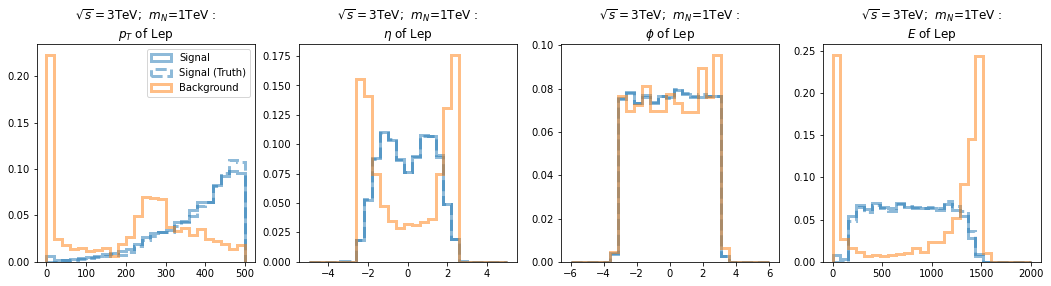

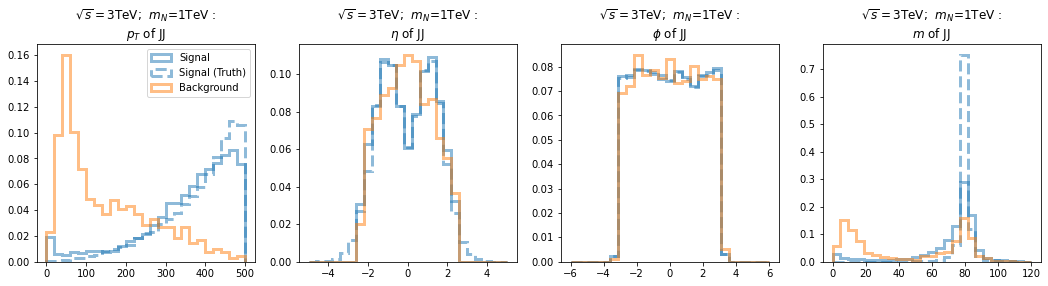

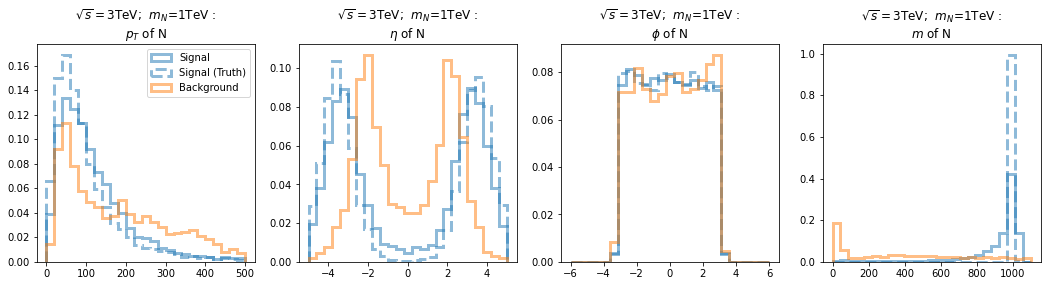

In [314]:
plot_them(df_o)

In [315]:
def cut_flow(df, col, upper=1e10, lower=-1e10, plot=False):
    print(f"cut :{col}>={lower} & {col}<={upper}")
    
    s_before = len(df[df.target==1])
    b_before = len(df[df.target!=1])
    print('Before cut:\tS samples:', s_before, '; B samples:', b_before)
    
    df = df[df[col] <= upper]
    df = df[df[col] >= lower]
    s_after = len(df[df.target==1])
    b_after = len(df[df.target!=1])
    print(f'After cut: \
    S samples: {s_after}/{s_before} ({round(100*(s_after/s_before),2)}%); B samples: {b_after}/{b_before} ({round(100*(b_after/b_before),2)}%)')
    
    if plot:
        plot_them(df)
        
    return df
    

cut :ptLep>=100 & ptLep<=10000000000.0
Before cut:	S samples: 8983 ; B samples: 1578
After cut:     S samples: 8823/8983 (98.22%); B samples: 1114/1578 (70.6%)


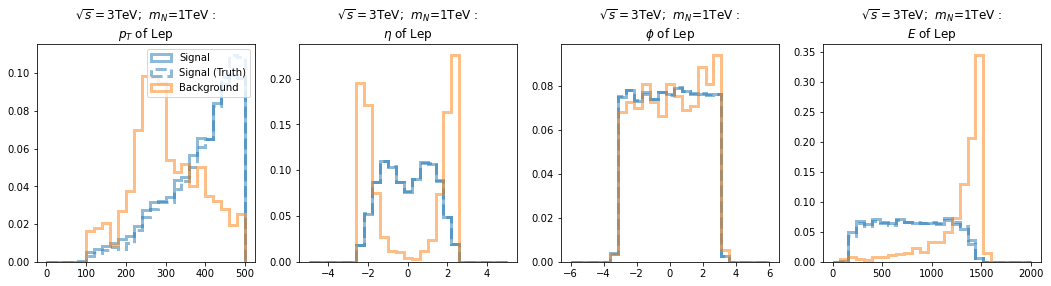

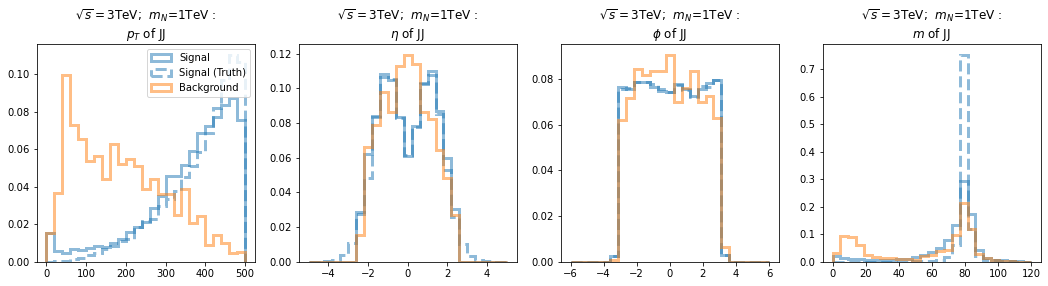

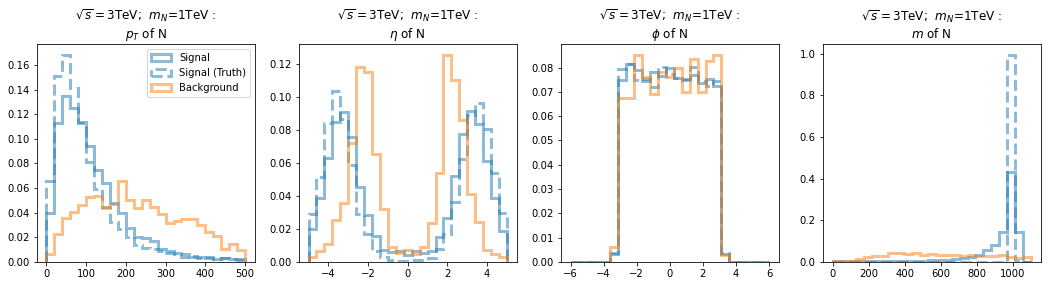

In [316]:
df = cut_flow(df_o, 'ptLep', lower=100, plot=True)

# df = cut_flow(df_o, 'ptLep', lower=50, plot=True)

# df = cut_flow(df_o, 'ptLep', upper=200, plot=True)


# df = cut_flow(df_o, 'ptLep', lower=500, plot=True)

cut :ptJJ>=100 & ptJJ<=10000000000.0
Before cut:	S samples: 8823 ; B samples: 1114
After cut:     S samples: 8483/8823 (96.15%); B samples: 791/1114 (71.01%)


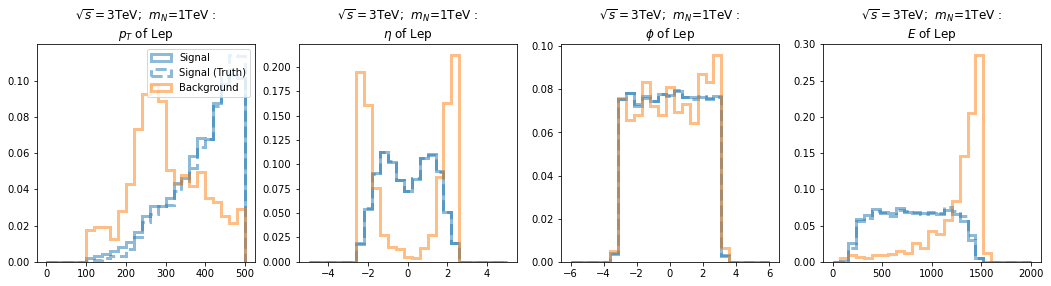

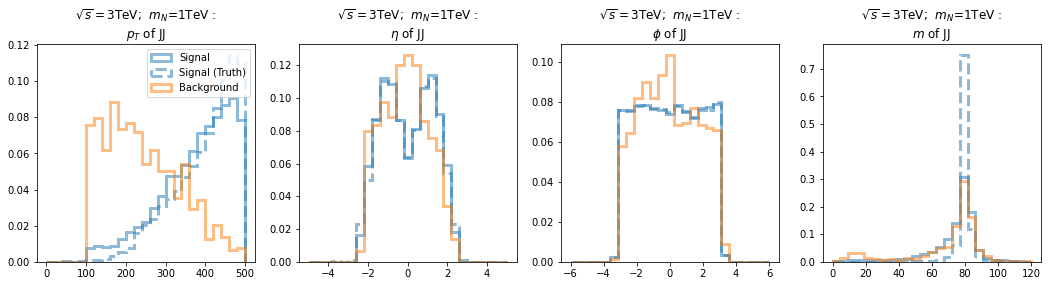

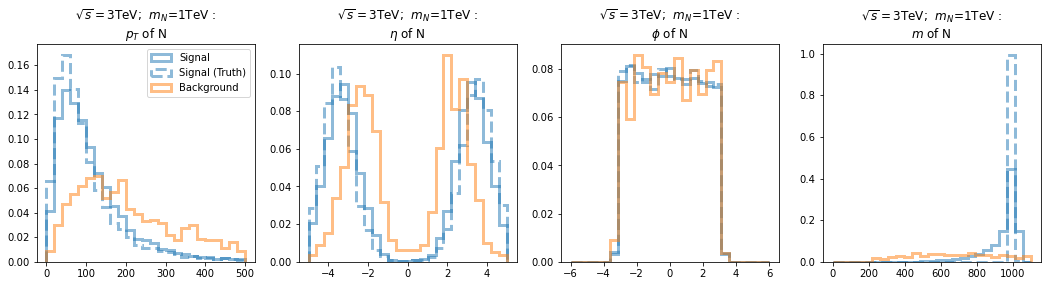

In [317]:
df = cut_flow(df, 'ptJJ', lower=100, plot=True)
# df = cut_flow(df, 'ptJJ', lower=50, plot=True)

cut :mJJ>=69.95400000000001 & mJJ<=90.804
Before cut:	S samples: 8483 ; B samples: 791
After cut:     S samples: 6031/8483 (71.1%); B samples: 513/791 (64.85%)


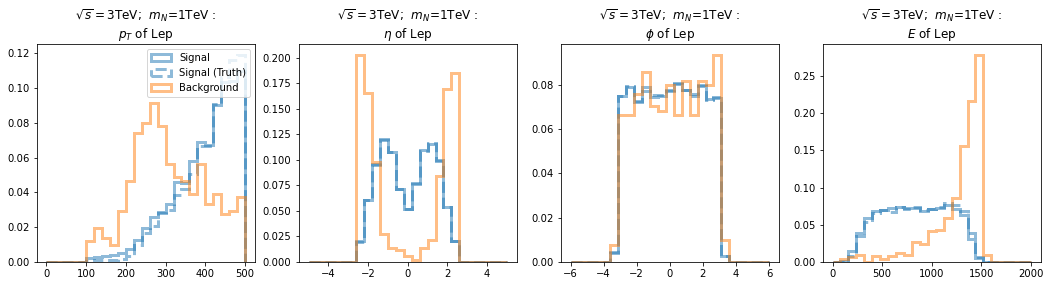

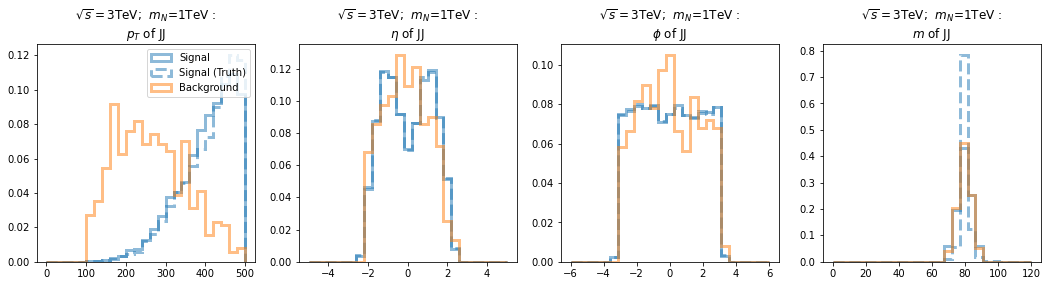

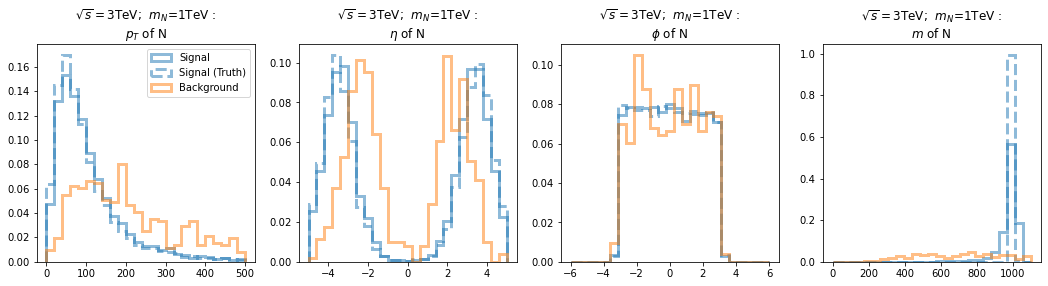

In [318]:
mW = 80.379
widthW = 2.085
nwidth = 5

df = cut_flow(df, 'mJJ', upper=mW+nwidth*widthW ,lower=mW-nwidth*widthW, plot=True)

In [319]:
df_s = df[df.target==1]
df_b = df[df.target!=1]

In [320]:
len(df_s)/len(df_s_o), len(df_s)/len(df_s_o)

(0.6713792719581432, 0.6713792719581432)

In [321]:
df_s_o[df_s_o.nJets==2]

,iEvt,ptLep,etaLep,phiLep,ELep,ptJet1,etaJet1,phiJet1,EJet1,ptJet2,...,DeltaRjjlTrue,ptJJTrue,etaJJTrue,phiJJTrue,mJJTrue,mNTrue,ptNTrue,etaNTrue,phiNTrue,target


m(N) between 900.0 and 1100.0 TeV
Signal:
Contains 5607/8983 = 62.42% of the reconstructed events (Found 1(or 2) Jet & >1 lepton)
Contains 5607/10000 = 56.07% of total simulations 

Background:
Contains 58/1578 = 3.68% of the reconstructed events (Found 1(or 2) Jet & >1 lepton)
Contains 58/10000 = 0.58% of total simulations 


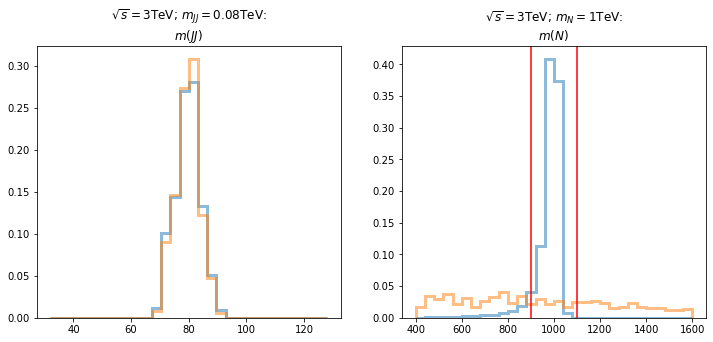

In [322]:
mJJ = 0.08
width_ = 0.6
width_num = 0.075
# width_num = 0.025
# lower_b, upper_b = mJJ*(1-width_num)*1000, mJJ*(1+width_num)*1000

sim_num=10000

plt.figure(figsize=(12,5))

range_ = [mJJ*(1-width_)*1000, mJJ*(1+width_)*1000]
bins_ = 30

ax1=plt.subplot(121)
ax1.hist(df_s['mJJ'], weights=[1/len(df_s)]*len(df_s), bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3);
plt.hist(df_b['mJJ'], weights=[1/len(df_b)]*len(df_b), bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3);
ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV; '+'$m_{JJ}=$'+str(mJJ)+'TeV:\n'+
          r'$m(JJ)$');


mN = 0.08
width_ = 0.6
width_num = 0.1
lower_b, upper_b = mN1*(1-width_num)*1000, mN1*(1+width_num)*1000

sim_num=10000

range_ = [mN1*(1-width_)*1000, mN1*(1+width_)*1000]
bins_ = 30

ax2=plt.subplot(122)
ax2.hist(df_s['mN'], weights=[1/len(df_s)]*len(df_s), bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3);
plt.hist(df_b['mN'], weights=[1/len(df_b)]*len(df_b), bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3);
ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV; '+'$m_{N}=$'+str(mN1)+'TeV:\n'+
          r'$m(N)$');

ax2.axvline(lower_b, color='red')
ax2.axvline(upper_b, color='red')

s_in_range = len(df_s[(df_s['mN'] >= lower_b) & (df_s['mN'] <= upper_b)])

print("m(N) between {} and {} TeV".format(lower_b, upper_b))
print("Signal:")
print("Contains {}/{} = {:.2f}% of the reconstructed events (Found 1(or 2) Jet & >1 lepton)".format(
    s_in_range, 
    len(df_s_o), 
    100*s_in_range/len(df_s_o)))

print("Contains {}/{} = {:.2f}% of total simulations ".format(
    s_in_range, 
    sim_num, 
    100*s_in_range/sim_num, sim_num))



b_in_range = len(df_b[(df_b['mN'] >= lower_b) & (df_b['mN'] <= upper_b)])

print("\nBackground:")
print("Contains {}/{} = {:.2f}% of the reconstructed events (Found 1(or 2) Jet & >1 lepton)".format(
    b_in_range, 
    len(df_b_o), 
    100*b_in_range/len(df_b_o)))

print("Contains {}/{} = {:.2f}% of total simulations ".format(
    b_in_range, 
    sim_num, 
    100*b_in_range/sim_num, sim_num))




In [323]:
30.75, 6.20, 0.05

(30.75, 6.2, 0.05)

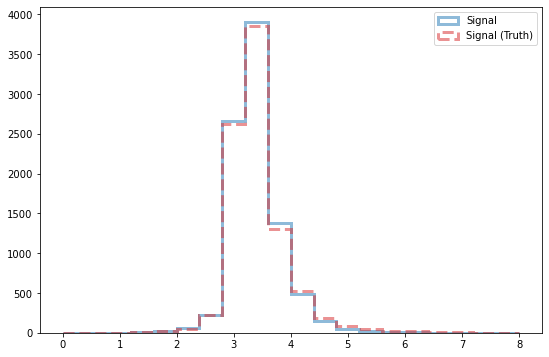

In [324]:
plt.figure(figsize=(9,6))
plt.hist(df_s_o['DeltaRjjl'], range=[0,8], bins=20, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
plt.hist(df_s_o['DeltaRjjlTrue'], range=[0,8], bins=20, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C3', linestyle='--');
plt.legend()

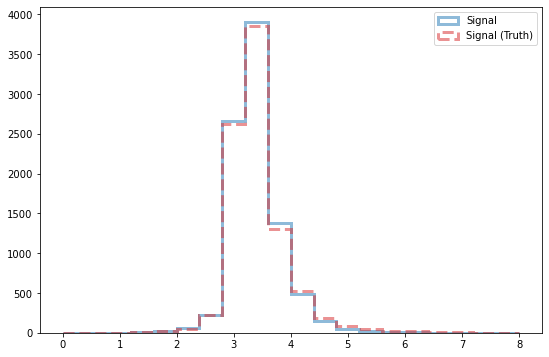

In [325]:
plt.figure(figsize=(9,6))
plt.hist(df_s_o['DeltaRjjl'], range=[0,8], bins=20, histtype='step', alpha=0.5, lw=3, label='Signal', color='C0');
plt.hist(df_s_o['DeltaRjjlTrue'], range=[0,8], bins=20, histtype='step', alpha=0.5, lw=3, label='Signal (Truth)', color='C3', linestyle='--');
plt.legend()